# Combine input image and heat-map
|<img src="./img/combine.jpg">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

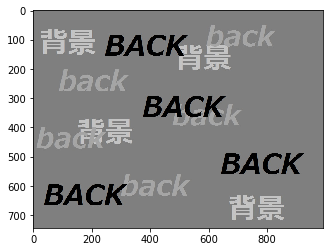

In [2]:
# read background (3 channel)
back = cv2.imread('./img/back.jpg')
plt.imshow(cv2.cvtColor(back, cv2.COLOR_BGR2RGB))

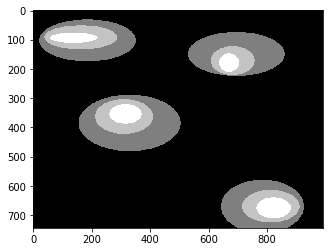

In [3]:
# read heat-map (1 channel)
forward = cv2.imread('./img/forward.jpg', flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(forward)
plt.gray()

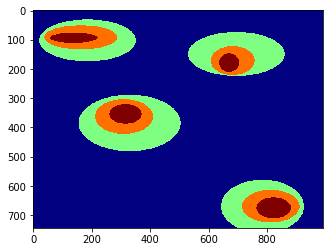

In [4]:
# convert to color image
tmp = forward / np.max(forward)
tmp = 255.0*tmp
heat_map = cv2.applyColorMap(np.uint8(tmp), cv2.COLORMAP_JET)
plt.imshow(cv2.cvtColor(heat_map, cv2.COLOR_BGR2RGB))

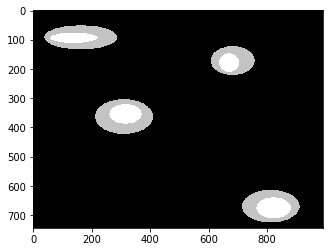

In [5]:
# make mask
thresh=180
_, mask = cv2.threshold(forward, thresh=thresh, maxval=255, type=cv2.THRESH_TOZERO)
mask = mask.astype(np.float) / 255.0
mask = np.transpose([mask, mask, mask], axes=[1, 2, 0])
plt.imshow(cv2.cvtColor((mask * 255.0).astype(np.uint8), cv2.COLOR_BGR2RGB))

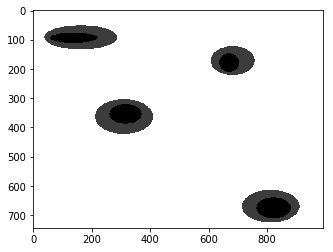

In [6]:
# make inverse mask
mask_inv = 1.0 - mask
plt.imshow(cv2.cvtColor((mask_inv * 255.0).astype(np.uint8), cv2.COLOR_BGR2RGB))

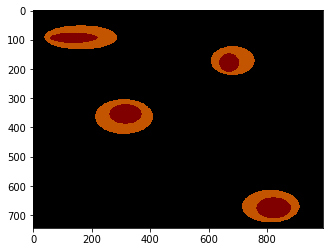

In [7]:
# apply mask to forward
heat_map_masked = np.multiply(heat_map, mask, dtype=np.float)
plt.imshow(cv2.cvtColor(heat_map_masked.astype(np.uint8), cv2.COLOR_BGR2RGB))

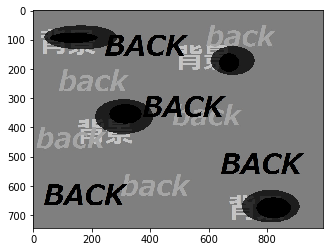

In [8]:
# apply inverse mask to back
back_masked = np.multiply(back, mask_inv, dtype=np.float)
plt.imshow(cv2.cvtColor(back_masked.astype(np.uint8), cv2.COLOR_BGR2RGB))

True

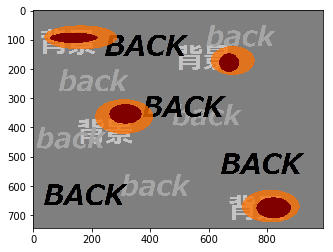

In [10]:
# combine masked images
result = cv2.add(heat_map_masked, back_masked)
plt.imshow(cv2.cvtColor(result.astype(np.uint8), cv2.COLOR_BGR2RGB))
cv2.imwrite('result.jpg', result)